In [15]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.formula.api import ols

In [2]:
#import data
df = pd.DataFrame(pd.read_csv(r'..\Project\CarPrice.csv'))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#car_ID is not needed
df.drop(columns=["car_ID"], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We had 26 columns and 205 rows in the data. we dropped column "Car ID" as it is not needed for analysis

<Axes: xlabel='price', ylabel='Count'>

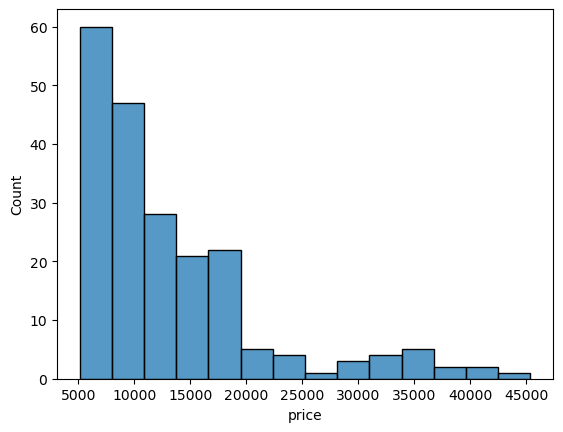

In [4]:
#let's plot the price to see distibution
sns.histplot(df['price'])

from the graph, we can see that distribution of the price  is right-skewed. which suggest that log-linear regression model might  fit better in comparison to simple linear regression

In [5]:
df.CarName.values[0:10]
df['Brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['Model'] = df.CarName.str.split(' ').str.get(1).str.upper()
len(set(df.Brand.values))
df.drop(columns=["CarName"], axis=1, inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246


In [6]:
df.Brand.unique()


array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'PORCSHCE', 'RENAULT',
       'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA', 'VOKSWAGEN', 'VOLKSWAGEN',
       'VW', 'VOLVO'], dtype=object)

In [7]:
# We have 5 car brand names which is spelled incorrectly. 
Brand_dict = {
    'TOYOUTA': 'TOYOTA',
    'MAXDA': 'MAZDA',
    'PORSCHE': 'PORCSHCE',
    'VOKSWAGEN': 'VOLKSWAGEN',
    'VW': 'VOLKSWAGEN',
}

# Correcting brand name in dataframe
df['Brand'] = df['Brand'].map(Brand_dict).fillna(df['Brand'])
# Let's test again if all corrected
df.Brand.unique()

array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI', 'NISSAN',
       'PEUGEOT', 'PLYMOUTH', 'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [8]:
df['RiskRate'] = df['symboling'].apply(lambda x : "High Risk" if x > 1 
                                                     else ("Medium Risk" if 0 <= x <= 1
                                                        else "Low Risk"))
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,RiskRate
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO,High Risk
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO,High Risk
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO,Medium Risk
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS,High Risk
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW),Low Risk
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA,Low Risk
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL,Low Risk
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246,Low Risk


In [9]:
#Let's see which columns are categorical and which are continues variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continues_columns = df.select_dtypes(exclude=['object', 'category']).columns
print("\033[1mCategorical\033[0m")
print(categorical_columns)
print("\033[1mContinues\033[0m")
print(continues_columns)

Categorical
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand',
       'Model', 'RiskRate'],
      dtype='object')
Continues
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [10]:
# One-hot encode categorical columns
#encoder = OneHotEncoder(sparse=False)
#encoded_data = encoder.fit_transform(df[categorical_columns])

# Scale the continuous columns
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df[continues_columns])


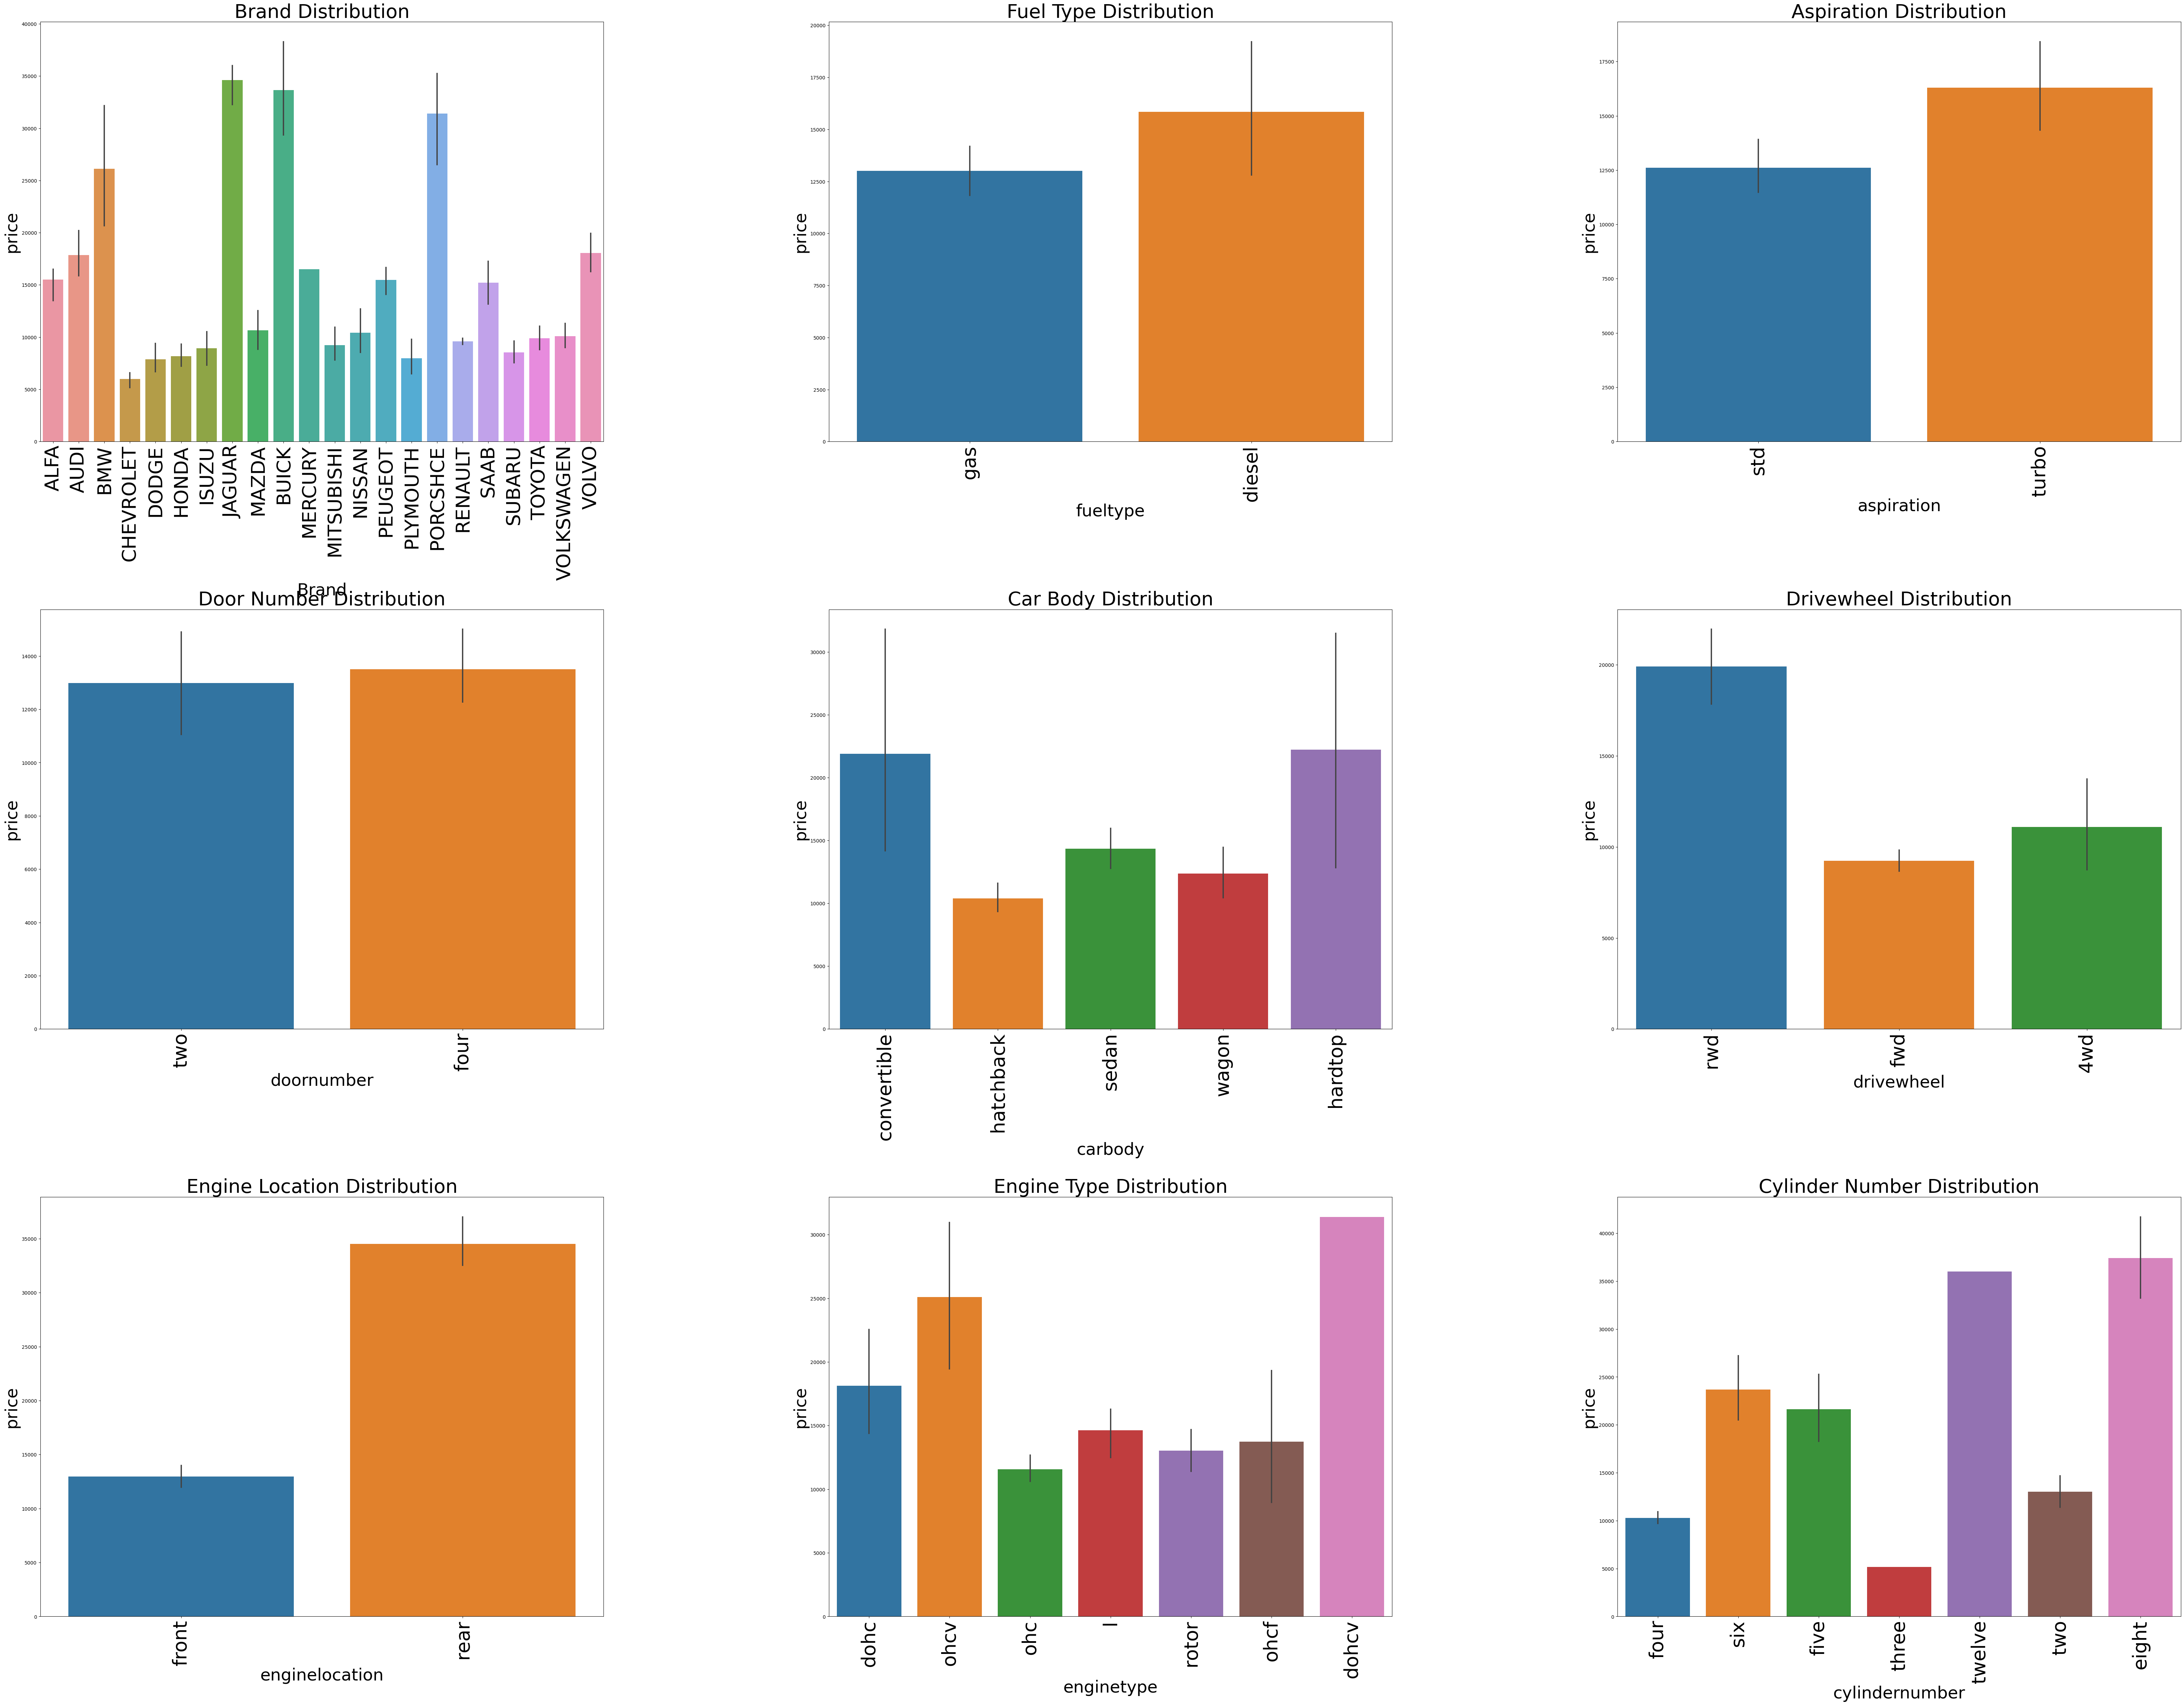

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(80, 60))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

charts = [
    {'title': "Brand Distribution", 'x': 'Brand', 'y': 'price'},
    {'title': "Fuel Type Distribution", 'x': 'fueltype', 'y': 'price'},
    {'title': "Aspiration Distribution", 'x': 'aspiration', 'y': 'price'},
    {'title': "Door Number Distribution", 'x': 'doornumber', 'y': 'price'},
    {'title': "Car Body Distribution", 'x': 'carbody', 'y': 'price'},
    {'title': "Drivewheel Distribution", 'x': 'drivewheel', 'y': 'price'},
    {'title': "Engine Location Distribution", 'x': 'enginelocation', 'y': 'price'},
    {'title': "Engine Type Distribution", 'x': 'enginetype', 'y': 'price'},
    {'title': "Cylinder Number Distribution", 'x': 'cylindernumber', 'y': 'price'},
    {'title': "Fuel System Distribution", 'x': 'fuelsystem', 'y': 'price'},
    {'title': "Risk Rate Distribution", 'x': 'RiskRate', 'y': 'price'}
]

counter = 0

for i in range(3):
    for j in range(3):
        if counter < len(charts):
            chart = charts[counter]
            plt.subplot(3, 3, counter+1)
            plt.title(chart['title'], fontsize=40)
            sns.barplot(x=chart['x'], y=chart['y'], data=df)
            plt.xlabel(chart['x'], fontsize=35)
            plt.ylabel(chart['y'], fontsize=35)
            plt.xticks(fontsize=40, rotation=90)
        else:
            axes[i, j].axis('off')
        counter += 1


plt.rcParams['figure.figsize'] = (190, 180)

plt.show()


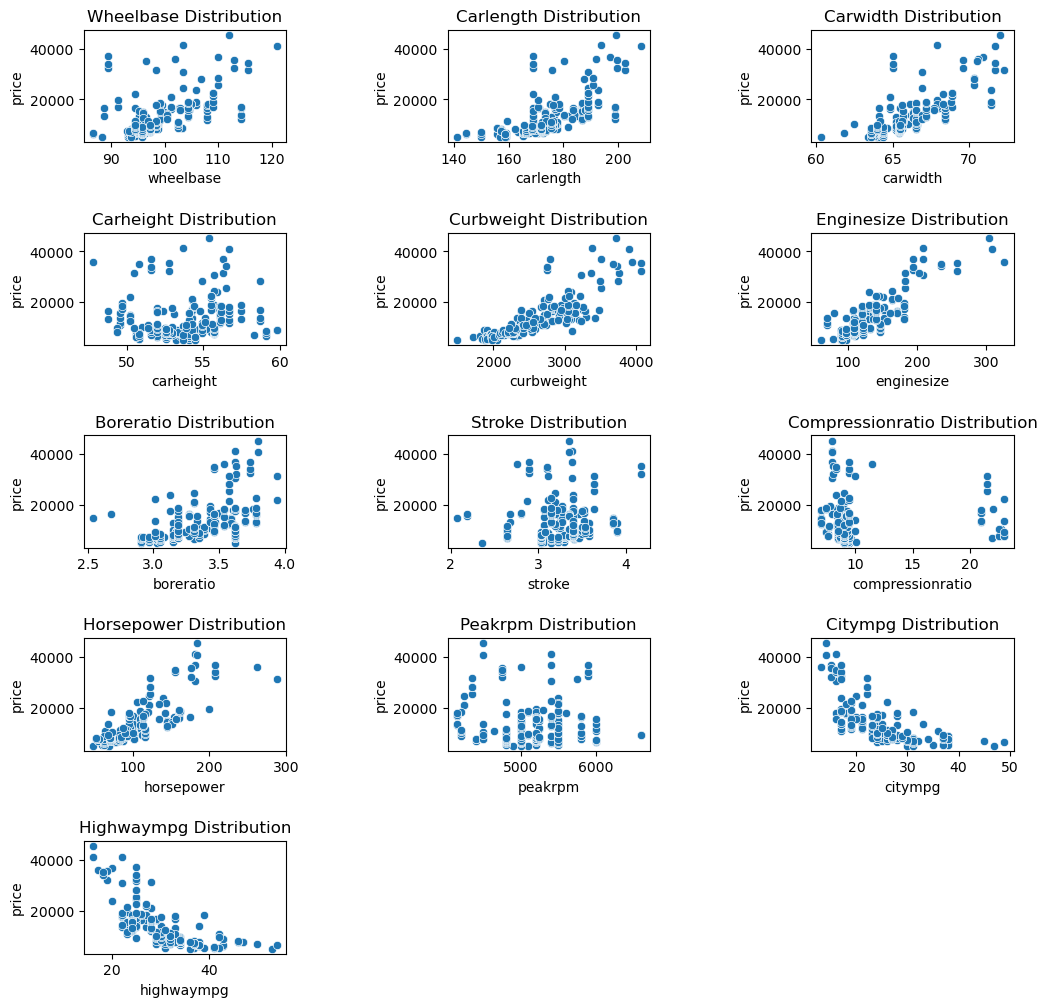

In [12]:

columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
           'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
           'citympg', 'highwaympg']


num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)

for i, col in enumerate(columns):
    row = i // num_cols
    col = df[col]  
    
    ax = axes[row, i % num_cols]
    ax.set_title(col.name.capitalize() + " Distribution")
    sns.scatterplot(x=col, y='price', data=df, ax=ax)


if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[-1, j])


plt.show()


C:\Users\Arshad\AppData\Local\Temp\ipykernel_7772\2216195962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


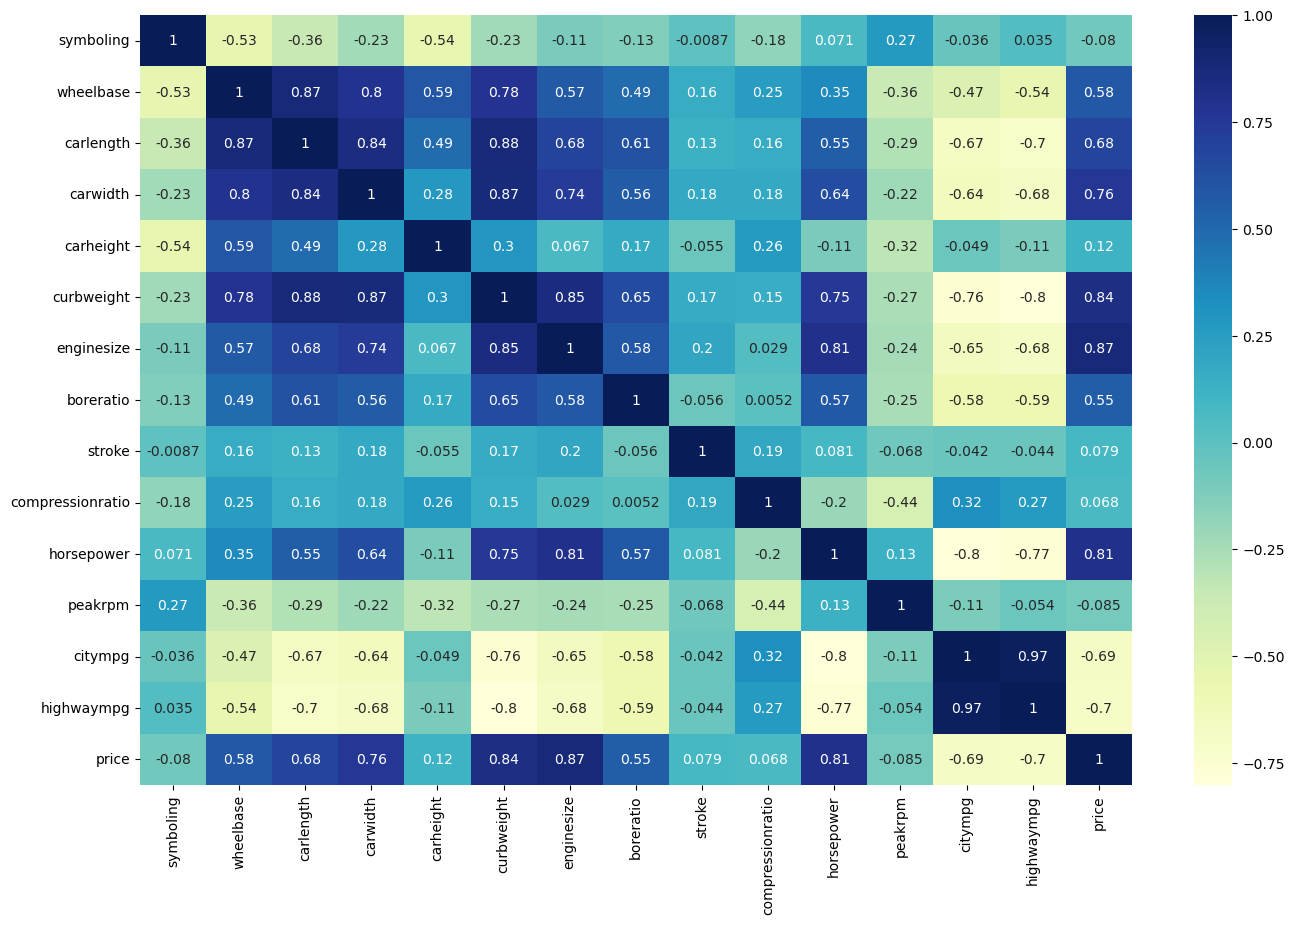

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

As it seems from corellation matrix, there are independent variables which have significant correlation between each other. So using all of them in regression model will mislead the result.


In [17]:
fit = ols('price ~ C(Brand) + C(fueltype) +C(aspiration)+C(carbody)+C(drivewheel)+ C(enginelocation)+C(enginetype)+C(cylindernumber)+curbweight+enginesize+horsepower+carwidth+carheight+citympg+highwaympg', data=df).fit() 

fit.summary()
          


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     75.71
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           8.23e-87
Time:                        00:06:55   Log-Likelihood:                -1810.9
No. Observations:                 205   AIC:                             3716.
Df Residuals:                     158   BIC:                             3872.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -3.653e+04   1.43e+04     -2.562      0.011   -6.47e+04   -8366.295
C(Brand)[T.AUDI]              -97.4962   2120.491     -0.046      0.963   -4285.662    4090.669
C(Brand)[T.BMW]              6467.9842   1924.597      3.361      0.001    2666.728    1.03e+04
C(Brand)[T.BUICK]            4576.0151   2476.177      1.848      0.066    -314.662    9466.692
C(Brand)[T.CHEVROLET]       -2649.9613   2080.168     -1.274      0.205   -6758.485    1458.562
C(Brand)[T.DODGE]           -3117.2366   1622.658     -1.921      0.057   -6322.135      87.662
C(Brand)[T.HONDA]           -2202.7868   1598.945     -1.378      0.170   -5360.850     955.276
C(Brand)[T.ISUZU]           -1425.4727   1797.726     -0.793      0.429   -4976.147    2125.201
C(Brand)[T.JAGUAR]           5541.3319   2479.741      2.235      0.027     643.615    1.04e+04
C(Brand)[T.MAZDA]           -2121.6194   1574.437     -1.348      0.180   -5231.277     988.039
C(Brand)[T.MERCURY]         -3824.6793   2674.879     -1.430      0.155   -9107.811    1458.452
C(Brand)[T.MITSUBISHI]      -4299.0407   1622.769     -2.649      0.009   -7504.160   -1093.922
C(Brand)[T.NISSAN]          -2672.3271   1489.599     -1.794      0.075   -5614.421     269.767
C(Brand)[T.PEUGEOT]           187.1429   1714.327      0.109      0.913   -3198.811    3573.096
C(Brand)[T.PLYMOUTH]        -3355.0588   1644.855     -2.040      0.043   -6603.799    -106.319
C(Brand)[T.PORCSHCE]         3148.1857   2528.832      1.245      0.215   -1846.490    8142.861
C(Brand)[T.RENAULT]         -4564.1895   2051.221     -2.225      0.027   -8615.540    -512.839
C(Brand)[T.SAAB]             -562.3626   1778.701     -0.316      0.752   -4075.461    2950.736
C(Brand)[T.SUBARU]          -4916.8949   1474.872     -3.334      0.001   -7829.903   -2003.887
C(Brand)[T.TOYOTA]          -3198.0073   1459.079     -2.192      0.030   -6079.822    -316.193
C(Brand)[T.VOLKSWAGEN]      -2731.1378   1585.154     -1.723      0.087   -5861.962     399.687
C(Brand)[T.VOLVO]            -779.3252   1790.339     -0.435      0.664   -4315.409    2756.759
C(fueltype)[T.gas]           -438.4642   1073.219     -0.409      0.683   -2558.170    1681.242
C(aspiration)[T.turbo]        753.0061    708.079      1.063      0.289    -645.516    2151.528
C(carbody)[T.hardtop]       -2482.4531   1201.037     -2.067      0.040   -4854.611    -110.295
C(carbody)[T.hatchback]     -2693.6238   1077.777     -2.499      0.013   -4822.332    -564.916
C(carbody)[T.sedan]         -2242.9886   1088.117     -2.061      0.041   -4392.119     -93.858
C(carbody)[T.wagon]         -2578.0560   1211.079     -2.129      0.035   -4970.049    -186.063
C(drivewheel)[T.fwd]         -757.7267    897.383     -0.844      0.400   -2530.140    1014.687
C(drivewhee